In [1]:
from sentinelhub import SHConfig


INSTANCE_ID = ''  # In case you put instance ID into configuration file you can leave this unchanged

if INSTANCE_ID:
    config = SHConfig()
    config.instance_id = INSTANCE_ID
else:
    config = None

In [2]:
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox

In [4]:
#image function
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)
    plt.colorbar()

### bounding box: [ long_lower_left, lat_lower_left, long_upper_right, lat_upper_right ]
#### aka: [x1, y1, x2, y2]

In [5]:
antelope_coords_wgs84 = [-118.4, 34.72, -118.36, 34.74]
antelope_bbox = BBox(bbox=antelope_coords_wgs84, crs=CRS.WGS84)

In [6]:
wcs_bands_request = WcsRequest(
    data_folder = 'Antelope_April_2019',
    layer='BANDS-S2-L1C',
    bbox=antelope_bbox,
    time=('2019-04-01', '2019-04-30'),
    resx = '10m',
    resy = '10m',
    image_format=MimeType.TIFF_d32f,
    config=config
)
#layer options: 'TRUE-COLOR-S2-L1C', 'TRUE-COLOR-S2-L2A', 'BANDS-S2-L1C'
#when using BANDS layer set image_format argument to 'MimeType.TIFF_d32f', otherwise leave arg out
#set time to 'latest' for latest image

In [38]:
%%time
wcs_bands_img = wcs_bands_request.get_data(save_data=True)

CPU times: user 121 ms, sys: 53 ms, total: 174 ms
Wall time: 104 ms


In [8]:
print('There are %d Sentinel-2 images available for the selected date range.' % len(wcs_bands_img))

print('Each image in the list is of type {} and has shape {}'.format(type(wcs_bands_img[0]),
                                                                         wcs_bands_img[0].shape))

There are 6 Sentinel-2 images available for the selected date range.
Each image in the list is of type <class 'numpy.ndarray'> and has shape (222, 366, 13)


In [ ]:
#import os

#for folder, _, filenames in os.walk(wcs_bands_request.data_folder):
    #for filename in filenames:
        #print(os.path.join(folder, filename))

In [555]:
wcs_bands_request.get_dates()

[datetime.datetime(2019, 4, 4, 18, 45, 30),
 datetime.datetime(2019, 4, 9, 18, 58, 48),
 datetime.datetime(2019, 4, 14, 19, 0, 32),
 datetime.datetime(2019, 4, 19, 18, 57, 15),
 datetime.datetime(2019, 4, 24, 18, 46, 25),
 datetime.datetime(2019, 4, 29, 18, 44, 56)]

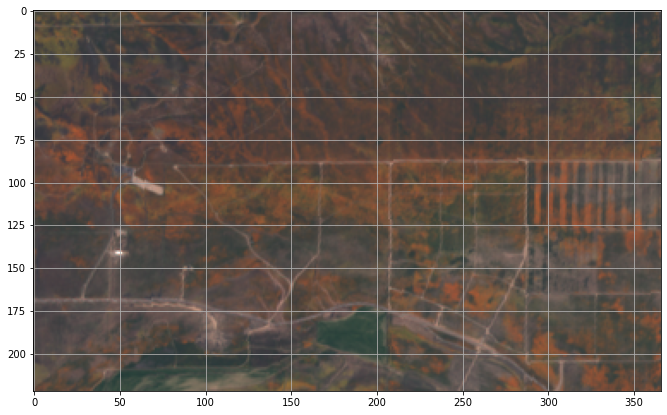

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
img = wcs_bands_img[2][:, :, [3,2,1]]
dat = ax.imshow(np.minimum(img * 2.5, 1))
#ax.set_xticks(np.arange(0, 250, 50))
#ax.set_yticks(np.arange(0, 400, 50))
ax.grid()

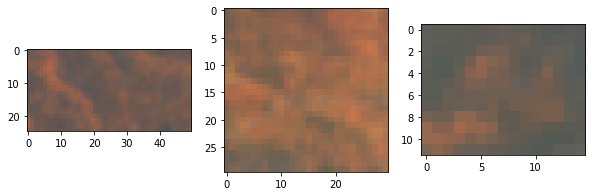

In [133]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

img_subset1 = wcs_bands_img[2][50:75, 150:200, :]
dat = ax[0].imshow(np.minimum(img_subset1[:, :, [3,2,1]] * 3.5, 1))

img_subset2 = wcs_bands_img[2][95:125, 175:205, :]
dat = ax[1].imshow(np.minimum(img_subset2[:, :, [3,2,1]] * 3.5, 1))

img_subset3 = wcs_bands_img[2][135:147, 100:115, :]
dat = ax[2].imshow(np.minimum(img_subset3[:, :, [3,2,1]] * 3.5, 1))


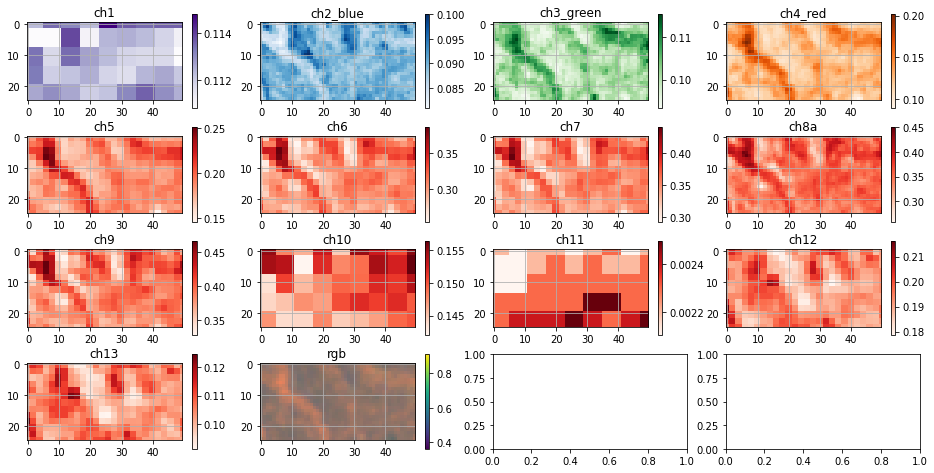

In [106]:
#look at all channels

img = img_subset1

fig, axs = plt.subplots(figsize=(16, 8), nrows=4, ncols=4)

ch1 = axs[0,0].imshow(img[:,:,0], cmap='Purples', interpolation='none')
fig.colorbar(ch1, ax=axs[0,0])
axs[0,0].set_title('ch1')
axs[0,0].grid()

ch2 = axs[0,1].imshow(img[:,:,1], cmap='Blues', interpolation='none')
fig.colorbar(ch2, ax=axs[0,1])
axs[0,1].set_title('ch2_blue')
axs[0,1].grid()

ch3 = axs[0,2].imshow(img[:,:,2], cmap='Greens', interpolation='none')
fig.colorbar(ch3, ax=axs[0,2])
axs[0,2].set_title('ch3_green')
axs[0,2].grid()

ch4 = axs[0,3].imshow(img[:,:,3], cmap='Oranges', interpolation='none')
fig.colorbar(ch4, ax=axs[0,3])
axs[0,3].set_title('ch4_red')
axs[0,3].grid()

ch5 = axs[1,0].imshow(img[:,:,4], cmap='Reds', interpolation='none')
fig.colorbar(ch5, ax=axs[1,0])
axs[1,0].set_title('ch5')
axs[1,0].grid()

ch6 = axs[1,1].imshow(img[:,:,5], cmap='Reds', interpolation='none')
fig.colorbar(ch6, ax=axs[1,1])
axs[1,1].set_title('ch6')
axs[1,1].grid()

ch7 = axs[1,2].imshow(img[:,:,6], cmap='Reds', interpolation='none')
fig.colorbar(ch7, ax=axs[1,2])
axs[1,2].set_title('ch7')
axs[1,2].grid()

ch8a = axs[1,3].imshow(img[:,:,7], cmap='Reds', interpolation='none')
fig.colorbar(ch8a, ax=axs[1,3])
axs[1,3].set_title('ch8a')
axs[1,3].grid()

ch8b = axs[2,0].imshow(img[:,:,8], cmap='Reds', interpolation='none')
fig.colorbar(ch8b, ax=axs[2,0])
axs[2,0].set_title('ch9')
axs[2,0].grid()

ch9 = axs[2,1].imshow(img[:,:,9], cmap='Reds', interpolation='none')
fig.colorbar(ch9, ax=axs[2,1])
axs[2,1].set_title('ch10')
axs[2,1].grid()

ch10 = axs[2,2].imshow(img[:,:,10], cmap='Reds', interpolation='none')
fig.colorbar(ch10, ax=axs[2,2])
axs[2,2].set_title('ch11')
axs[2,2].grid()

ch11 = axs[2,3].imshow(img[:,:,11], cmap='Reds', interpolation='none')
fig.colorbar(ch11, ax=axs[2,3])
axs[2,3].set_title('ch12')
axs[2,3].grid()

ch12 = axs[3,0].imshow(img[:,:,12], cmap='Reds', interpolation='none')
fig.colorbar(ch12, ax=axs[3,0])
axs[3,0].set_title('ch13')
axs[3,0].grid()

rgb = axs[3,1].imshow(img[:,:,[3,2,1]] * 4.5, interpolation='none')
fig.colorbar(rgb, ax=axs[3,1])
axs[3,1].set_title('rgb')
axs[3,1].grid()

plt.show()

In [537]:
#threshold sub-area1
tmp = img_subset1[:,:,3]
x = np.zeros(tmp.shape)
n = 0.125
x[tmp>n] = tmp[tmp>n]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


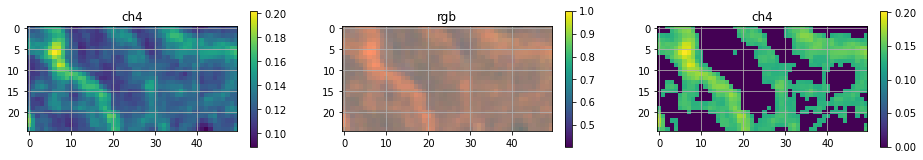

In [538]:
fig, axs = plt.subplots(figsize=(16, 2.5), nrows=1, ncols=3)

ch4 = axs[0].imshow(tmp, interpolation='none')
fig.colorbar(ch4, ax=axs[0])
axs[0].set_title('ch4')
axs[0].grid()

rgb = axs[1].imshow(img_subset1[:, :, [3,2,1]] * 5, interpolation='none')
fig.colorbar(rgb, ax=axs[1])
axs[1].set_title('rgb')
axs[1].grid()

ch4 = axs[2].imshow(x, interpolation='none')
fig.colorbar(ch4, ax=axs[2])
axs[2].set_title('ch4')
axs[2].grid()

In [539]:
#threshold sub-area2
tmp = img_subset2[:,:,3]
x = np.zeros(tmp.shape)
n = 0.135
x[tmp>n] = tmp[tmp>n]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


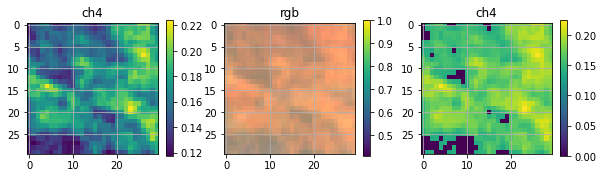

In [540]:
fig, axs = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=3)

ch4 = axs[0].imshow(tmp, interpolation='none')
fig.colorbar(ch4, ax=axs[0])
axs[0].set_title('ch4')
axs[0].grid()

rgb = axs[1].imshow(img_subset2[:, :, [3,2,1]] * 5, interpolation='none')
fig.colorbar(rgb, ax=axs[1])
axs[1].set_title('rgb')
axs[1].grid()

ch4 = axs[2].imshow(x, interpolation='none')
fig.colorbar(ch4, ax=axs[2])
axs[2].set_title('ch4')
axs[2].grid()

In [541]:
#threshold sub-area3
tmp = img_subset3[:,:,3]
x = np.zeros(tmp.shape)
n = 0.105
x[tmp>n] = tmp[tmp>n]

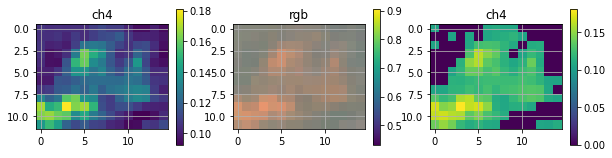

In [542]:
fig, axs = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=3)

ch4 = axs[0].imshow(tmp, interpolation='none')
fig.colorbar(ch4, ax=axs[0])
axs[0].set_title('ch4')
axs[0].grid()

rgb = axs[1].imshow(img_subset3[:, :, [3,2,1]] * 5, interpolation='none')
fig.colorbar(rgb, ax=axs[1])
axs[1].set_title('rgb')
axs[1].grid()

ch4 = axs[2].imshow(x, interpolation='none')
fig.colorbar(ch4, ax=axs[2])
axs[2].set_title('ch4')
axs[2].grid()

In [231]:
#get subset1 poppy pixels

#create iterator for 2D ch3 array
it = np.nditer(img_subset1[:,:,3], flags=['multi_index'])

#initialize array for poppy pixels
poppy_pos_subset1 = np.zeros((1,13))

for x in it:
    if x > 0.125:
        tmp = np.zeros((1,13))
        tmp[:] = img_subset1[it.multi_index[0],it.multi_index[1],:]
        poppy_pos_subset1 = np.vstack((poppy_pos_subset1,tmp))

#remove top layer of zeros
poppy_pos_subset1 = poppy_pos_subset1[1:,:]

poppy_pos_subset1.shape

(693, 13)

In [232]:
#get subset2 poppy pixels

#create iterator for 2D ch3 array
it = np.nditer(img_subset2[:,:,3], flags=['multi_index'])

#initialize array for poppy pixels
poppy_pos_subset2 = np.zeros((1,13))

for x in it:
    if x > 0.125:
        tmp = np.zeros((1,13))
        tmp[:] = img_subset2[it.multi_index[0],it.multi_index[1],:]
        poppy_pos_subset2 = np.vstack((poppy_pos_subset2,tmp))

#remove top layer of zeros
poppy_pos_subset2 = poppy_pos_subset2[1:,:]

poppy_pos_subset2.shape

(880, 13)

In [233]:
#get subset3 poppy pixels

#create iterator for 2D ch3 array
it = np.nditer(img_subset3[:,:,3], flags=['multi_index'])

#initialize array for poppy pixels
poppy_pos_subset3 = np.zeros((1,13))

for x in it:
    if x > 0.125:
        tmp = np.zeros((1,13))
        tmp[:] = img_subset3[it.multi_index[0],it.multi_index[1],:]
        poppy_pos_subset3 = np.vstack((poppy_pos_subset3,tmp))

#remove top layer of zeros
poppy_pos_subset3 = poppy_pos_subset3[1:,:]

poppy_pos_subset3.shape

(51, 13)

In [235]:
#concatenate all poppy pixels
poppy_pos = np.concatenate((poppy_pos_subset1, poppy_pos_subset2, poppy_pos_subset3))
poppy_pos.shape

(1624, 13)

In [154]:
#get January images for no-poppy labels
wcs_bands_request_jan = WcsRequest(
    data_folder = 'Antelope_January_2019',
    layer='BANDS-S2-L1C',
    bbox=antelope_bbox,
    time=('2019-01-01', '2019-01-31'),
    resx = '10m',
    resy = '10m',
    image_format=MimeType.TIFF_d32f,
    config=config
)

In [155]:
wcs_bands_img_jan = wcs_bands_request_jan.get_data(save_data=True)

In [156]:
wcs_bands_request_jan.get_dates()

[datetime.datetime(2019, 1, 4, 18, 44, 43),
 datetime.datetime(2019, 1, 9, 18, 44, 47),
 datetime.datetime(2019, 1, 14, 18, 44, 44),
 datetime.datetime(2019, 1, 19, 18, 44, 48),
 datetime.datetime(2019, 1, 24, 18, 44, 45),
 datetime.datetime(2019, 1, 29, 18, 44, 48)]

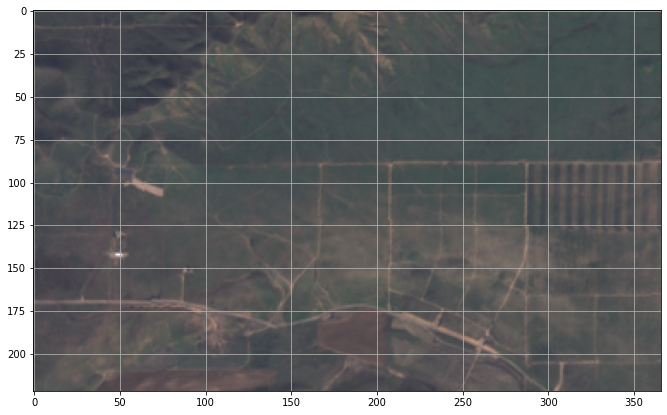

In [169]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
img = wcs_bands_img_jan[3][:, :, [3,2,1]]
dat = ax.imshow(np.minimum(img * 2.5, 1))
ax.grid()

In [364]:
#get random pixel locations for poppy_negative labels

#copy array and reshape so channels are columns, and pixels are rows
c = np.empty_like(wcs_bands_img_jan[3])
c[:] = wcs_bands_img_jan[3]
d = np.reshape(c, (-1,13))

#randomly shuffle rows
rng = np.random.default_rng(seed=1)
rng.shuffle(d)

#only keep n pixels = to n poppy positive pixels
poppy_neg = d[0:poppy_pos.shape[0],:]

In [398]:
a = np.mean(poppy_pos,axis=0)
b = np.mean(poppy_neg,axis=0)
print(a)
print(b)

[0.11148615 0.08812081 0.11215462 0.15583627 0.21457112 0.35842518
 0.4121694  0.41268399 0.45103362 0.16810511 0.00265597 0.20139458
 0.10644113]
[0.14654219 0.12980068 0.12893751 0.12693743 0.16072355 0.22765651
 0.24770151 0.24455613 0.26603928 0.10124315 0.0014686  0.27940154
 0.18151675]


In [414]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [428]:
#get features and labels
X = np.vstack((poppy_pos, poppy_neg))
y = np.concatenate( ( np.ones(poppy_pos.shape[0]), np.ones(poppy_neg.shape[0]) * 2 ) )

In [434]:
#test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [439]:
#normalize test data
normalizer = preprocessing.Normalizer().fit(X_train)
X_normalized = normalizer.transform(X_train)

In [440]:
#build and fit model
logisticRegr = LogisticRegression(random_state=1)

logisticRegr.fit(X_normalized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [487]:
predictions = logisticRegr.predict(X_test)

In [442]:
score = logisticRegr.score(X_test, y_test)
print(score)

1.0


In [488]:
#copy April array image and reshape so channels are columns, and pixels are rows
c = np.empty_like(wcs_bands_img[2])
c[:] = wcs_bands_img[2]
d = np.reshape(c, (-1,13))

#apply the normalization to the April image
e = normalizer.transform(d)

#predict the rest of the pixels
predictions2 = logisticRegr.predict(e)

In [489]:
f = np.reshape(predictions2, c[:,:,1].shape)

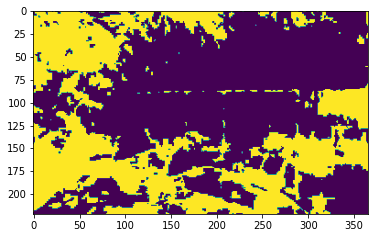

In [508]:
im = plt.imshow(f)

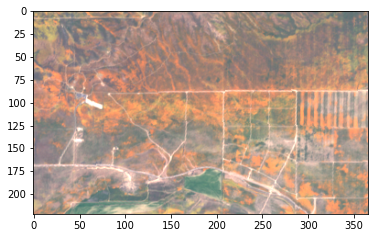

In [507]:
im = plt.imshow(np.minimum(c[:,:,[3,2,1]] * 5, 1))

In [503]:
#get predicted percent of poppy coverage
n = len(predictions2[predictions2==1])
poppy_coverage = n / len(predictions2)
print(poppy_coverage)

0.6191109141928814


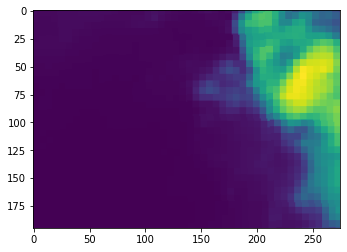

In [543]:
im = plt.imshow(wcs_bands_img[3][25:220,0:275,10])

In [546]:
x = logisticRegr.predict_proba(X_test)

(array([209.,  60.,  24.,  11.,   4.,   0.,   0.,   6.,  92., 244.]),
 array([0.02433332, 0.12022681, 0.21612031, 0.3120138 , 0.4079073 ,
        0.5038008 , 0.59969429, 0.69558779, 0.79148129, 0.88737478,
        0.98326828]),
 <a list of 10 Patch objects>)

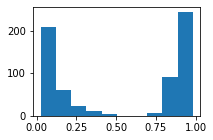

In [554]:
fig, ax = plt.subplots(figsize=(3,2))
plt.hist(x[:,0])